In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Datasets/car data.csv")

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.shape

(301, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [30]:
df.dropna(inplace=True)


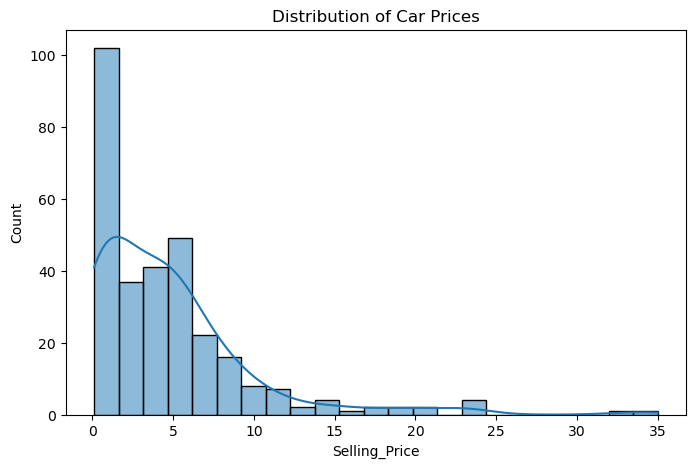

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.show()


In [32]:
df = df.drop('Car_Name', axis=1)
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [34]:
df_encoded = pd.get_dummies(
    df,
    columns=['Fuel_Type', 'Selling_type', 'Transmission'],
    drop_first=True
)

df_encoded.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [35]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     301 non-null    int64  
 1   Selling_Price            301 non-null    float64
 2   Present_Price            301 non-null    float64
 3   Driven_kms               301 non-null    int64  
 4   Owner                    301 non-null    int64  
 5   Fuel_Type_Diesel         301 non-null    bool   
 6   Fuel_Type_Petrol         301 non-null    bool   
 7   Selling_type_Individual  301 non-null    bool   
 8   Transmission_Manual      301 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 13.1 KB


In [36]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (301, 8)
y shape: (301,)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (240, 8)
Testing samples: (61, 8)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


Linear Regression Performance
MAE : 1.2163740193336887
RMSE: 1.8658375680950685
R2  : 0.8488707839191807


In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R2  :", r2_rf)


Random Forest Performance
MAE : 0.6069524590163923
RMSE: 0.9275298078370463
R2  : 0.962652931872927


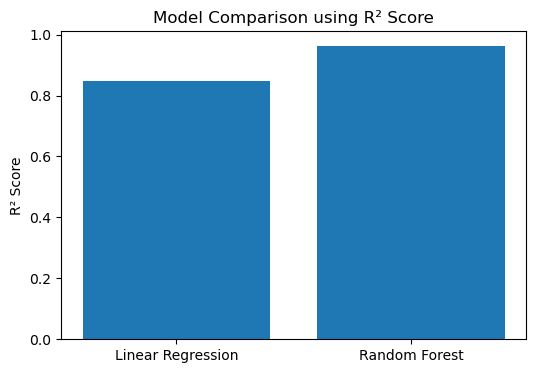

In [41]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr, r2_rf]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.title("Model Comparison using R² Score")
plt.ylabel("R² Score")
plt.show()


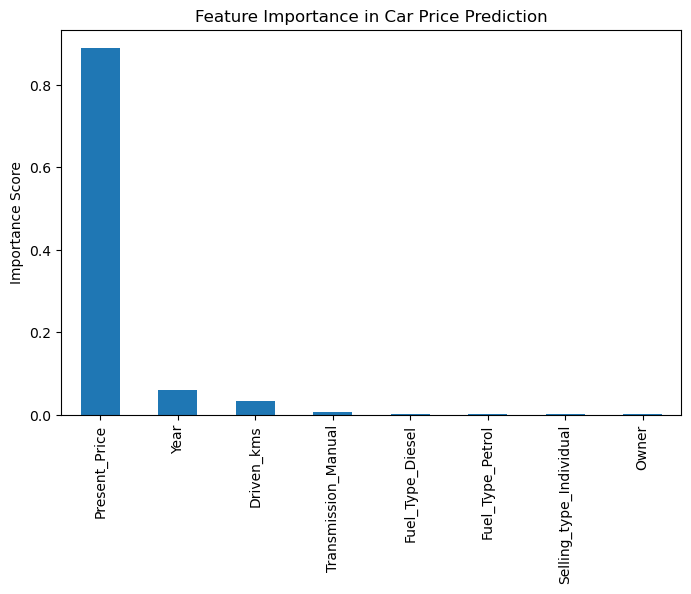

In [42]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Car Price Prediction")
plt.ylabel("Importance Score")
plt.show()


## Conclusion

In this project, we analyzed a car price dataset and built machine learning models
to predict the selling price of cars.

- Data preprocessing and encoding were performed successfully.
- Linear Regression was used as a baseline model.
- Random Forest Regressor achieved better performance with higher R² score.
- Feature importance analysis showed that Present_Price, Year, and Driven_kms
  are the most influential features.

This model can help estimate car prices based on historical data.
